In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import xgboost as xg
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import RFE, VarianceThreshold
sns.set_theme(style='darkgrid')



import missingno as msno

In [2]:
DATA_DIR = '/Users/andishetavakkoli/Documents/notebook/github_project/machine-learning-projects-data/anomaly_detection/'

In [3]:
df = pd.read_csv(DATA_DIR +'creditcard.csv')

In [4]:
df.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


## Missingno function

In [5]:
def missing_plot(df):
    return msno.matrix(df, fontsize=8, figsize=(15, 7))

# Helper Function

In [12]:
def summary_statistic(df) -> pd.DataFrame:
    """
    Calculate summary statistics for the given pandas DataFrame.
    
    Args:
        df (pandas.DataFrame): Input DataFrame, assumed to be in CSV format.
        
    Returns:
        pandas.DataFrame: DataFrame containing information about the columns.
    
    """
    feature_describe = df.describe().T.reset_index().rename(
                           columns={'index':'feature'}).drop(columns='count')

    feature_info = pd.concat([df.dtypes,
                               df.nunique(),
                               df.isna().sum(),
                               df.count()], axis=1,
                keys=['type', 'count_unique', 'count_nan', 'count']).reset_index().rename(columns={'index':'feature'})

    summary_statistic_result = feature_info.merge(feature_describe, how='left', on='feature')

    return summary_statistic_result


In [15]:
summary_statistic(df_iris)

,feature,type,count_unique,count_nan,count,mean,std,min,25%,50%,75%,max
0,sepal_length,float64,35,0,150,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
1,sepal_width,float64,23,0,150,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
2,petal_length,float64,43,0,150,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
3,petal_width,float64,22,0,150,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
4,species,object,3,0,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Calculate missing values

In [ ]:
def calculate_missing_values(dataframe):
    missing_values_count = dataframe.isnull().sum()
    missing_values_percentage = (missing_values_count / len(dataframe)) * 100
    missing_values_summary = pd.concat([missing_values_count, missing_values_percentage], axis=1)
    missing_values_summary.columns = ['Missing Count', 'Missing Percentage']
    missing_values_summary.sort_values(by='Missing Count', ascending=False, inplace=True)
    return missing_values_summary


In [ ]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))
    print("---"*20)
    plot_confusion_matrix(model, X_test, y_test, cmap="plasma")

In [ ]:
def train_val(y_train, y_train_pred, y_test, y_pred):
    
    scores = {"train_set": {"Accuracy" : accuracy_score(y_train, y_train_pred),
                            "Precision" : precision_score(y_train, y_train_pred),
                            "Recall" : recall_score(y_train, y_train_pred),                          
                            "f1" : f1_score(y_train, y_train_pred),
                            "roc_auc" : roc_auc_score(y_train, y_train_pred),
                            "recall_auc" : auc(recall, precision)},
    
              "test_set": {"Accuracy" : accuracy_score(y_test, y_pred),
                           "Precision" : precision_score(y_test, y_pred),
                           "Recall" : recall_score(y_test, y_pred),                          
                           "f1" : f1_score(y_test, y_pred),
                           "roc_auc" : roc_auc_score(y_test, y_pred),
                           "recall_auc" : auc(recall, precision)}}
    
    return pd.DataFrame(scores)

# Corrolation Visualization

In [ ]:
df_out.corr()['class'].sort_values().drop('class').iplot(kind = 'barh', title = 'Correlation Between the Columns');

In [ ]:
RFSmote_feature_imp = pd.DataFrame(index=X.columns, data = RF_smote_model.feature_importances_, columns = ['Importance']).sort_values("Importance", ascending = False)

fig = px.bar(RFSmote_feature_imp.sort_values('Importance', ascending = False), x = RFSmote_feature_imp.sort_values('Importance', 
             ascending = False).index, y = 'Importance', title = "RFSmote Feature_Importance", 
             labels = dict(x = "Features", y ="Importance"))
fig.show()

# Save and Export the Model as .pkl

In [ ]:
logistic_regression = pickle.dump(LogReg_Deploy, open('logistic_regression_model', 'wb'))

# Feature Selection

In [110]:
X = df.drop(columns=['Class'])
y = df['Class']

## Train, test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=42, test_size=0.3)

## Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## SMOTE

sm = SMOTE()
X_train_resample, y_train_resample = sm.fit_resample(X_train_scaled, y_train)

## Model
lr = LogisticRegression()

In [114]:
rf = RFE(lr, n_features_to_select=7, verbose=2, step=5)
rf.fit(X_train_resample, y_train_resample)

Fitting estimator with 30 features.
Fitting estimator with 25 features.
Fitting estimator with 20 features.
Fitting estimator with 15 features.
Fitting estimator with 10 features.


RFE(estimator=LogisticRegression(), n_features_to_select=7, step=5, verbose=2)

In [115]:
X.columns[rf.support_]

Index(['Time', 'V4', 'V5', 'V10', 'V12', 'V13', 'V14'], dtype='object')

In [118]:
lr.fit(X_train_resample, y_train_resample)
lr.coef_

array([[-7.60288661e-01,  1.97250693e+00,  1.20956179e-01,
         3.69023003e-01,  1.76871153e+00,  1.03157703e+00,
        -4.42576566e-01, -8.39272194e-01, -6.87119914e-01,
        -1.07306539e+00, -2.09645956e+00,  5.62600367e-01,
        -1.15854044e+00, -4.80953989e-01, -1.50914854e+00,
        -5.86512805e-04, -8.24930617e-01, -9.68276082e-01,
        -2.38710819e-01,  3.72008908e-01, -9.77052913e-01,
         2.96104910e-01,  6.46086690e-01,  1.68485674e-01,
        -2.23857719e-02, -1.67106045e-02, -2.01093253e-01,
        -4.19959475e-01,  1.27680511e-01,  1.51788276e+00]])

In [132]:
{key:value  for key, value in zip(X.columns, rf.ranking_) if value==1}

{'Time': 1, 'V4': 1, 'V5': 1, 'V10': 1, 'V12': 1, 'V13': 1, 'V14': 1}

In [122]:
dict(zip(X.columns, abs(lr.coef_[0])))

{'Time': 0.7602886606154805,
 'V1': 1.9725069259853054,
 'V2': 0.12095617893252869,
 'V3': 0.36902300348175054,
 'V4': 1.7687115264466085,
 'V5': 1.0315770307951926,
 'V6': 0.44257656603257606,
 'V7': 0.8392721944348359,
 'V8': 0.6871199143029979,
 'V9': 1.0730653891150335,
 'V10': 2.0964595629541076,
 'V11': 0.5626003666091132,
 'V12': 1.1585404364164318,
 'V13': 0.4809539888886864,
 'V14': 1.5091485424036089,
 'V15': 0.0005865128052042981,
 'V16': 0.8249306165454847,
 'V17': 0.9682760818122774,
 'V18': 0.23871081945103723,
 'V19': 0.37200890841573475,
 'V20': 0.9770529134999123,
 'V21': 0.29610490957573665,
 'V22': 0.6460866896646608,
 'V23': 0.16848567443753734,
 'V24': 0.022385771945054575,
 'V25': 0.016710604504513473,
 'V26': 0.20109325326844382,
 'V27': 0.4199594751287351,
 'V28': 0.12768051096882718,
 'Amount': 1.5178827628005216}

# Machine Learning

### Scaling --> This method is **WRONG**(Data Leakage), we should first split data and then scale x_train and x_test seperatley

In [15]:
X = df.drop(columns=['Class'])
y = df['Class']

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=42, test_size=0.3)

### Scaling --> This method is RIGHT, we  first split data and then scale x_train and x_test seperatley

<Axes: xlabel='Degree of Importance', ylabel='Feature'>

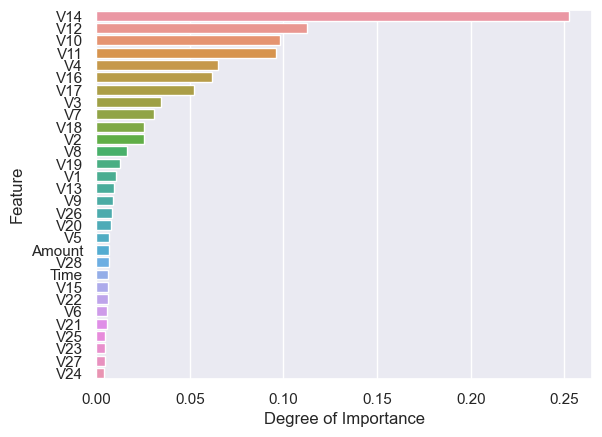

In [107]:
# ## Train, test split
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=42, test_size=0.3)

# ## Scaling
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# ## SMOTE

# sm = SMOTE()
# X_train_resample, y_train_resample = sm.fit_resample(X_train_scaled, y_train)

# ## Model
# model = RandomForestClassifier(n_estimators=50)
# model.fit(X_train_resample, y_train_resample)
# y_pred_test = model.predict(X_test_scaled)
# y_pred_train = model.predict(X_train_resample)

# ## Model Evaluation

# ### Test
# print('Test')
# print(classification_report(y_test, y_pred_test))
# sns.heatmap(confusion_matrix(y_test, y_pred_test))
# plt.show()

# print('Train')
# ### Train
# print(classification_report(y_train_resample, y_pred_train))
# sns.heatmap(confusion_matrix(y_train_resample, y_pred_train))
# plt.show()


df_new = pd.DataFrame(sorted(list(zip(X.columns, model.feature_importances_)), key=lambda x:x[1], reverse=True), columns=['Feature', 'Degree of Importance'])
sns.barplot(df_new, y='Feature', x='Degree of Importance')

In [ ]:
{'Time': 1, 'V4': 1, 'V5': 1, 'V10': 1, 'V12': 1, 'V13': 1, 'V14': 1

<Axes: xlabel='Degree of Importance', ylabel='Feature'>

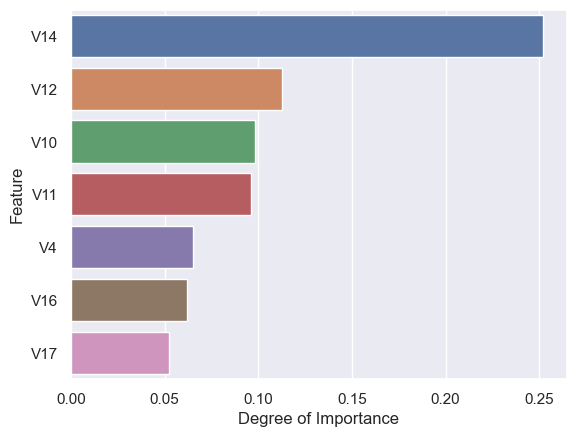

In [106]:
mask = model.feature_importances_ > 0.05
X_reduced = X.loc[:, mask]
X_reduced.columns

df_reduce = pd.DataFrame(sorted(list(zip(X.columns, model.feature_importances_)), key=lambda x:x[1], reverse=True), columns=['Feature', 'Degree of Importance'])
df_reduce = df_reduce[df_reduce['Feature'].isin(X_reduced.columns)]
sns.barplot(df_reduce, y='Feature', x='Degree of Importance')

# Using Pipeline

In [29]:
pl = Pipeline([
    ('scale', StandardScaler()),
    ('smote', SMOTE()),
    ('model', RandomForestClassifier(n_estimators=50))
])

In [30]:
pl.fit(X_train, y_train)

Pipeline(steps=[('smote', SMOTE()),
                ('model', RandomForestClassifier(n_estimators=50))])

In [31]:
y_pred = pl.predict(X_test_scaled)

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.83      0.85        98

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [33]:
y_pred_train = pl.predict(X_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



# Combine SMOTE with Undersampling

In [37]:
# over = SMOTE(sampling_strategy = {1: 10000})
# under = RandomUnderSampler(sampling_strategy = {0: 10000})
# steps = [('o', over), ('u', under)]
# pipeline = Pipeline(steps = steps)
# X, y = pipeline.fit_resample(X, y)

## Apply Gridsearch

In [ ]:
pl = Pipeline([('smote', SMOTE()), ('model', RandomForestClassifier(n_estimators=50))])

In [53]:
params = {'model__n_estimators': [50, 100, 200],
          'model__max_depth': [3, 5, 7],
          'model__min_samples_split': [2, 5, 8]
         }


In [54]:
model_gs = RandomizedSearchCV(pl, param_grid=params, scoring='f1', cv=5)

In [56]:
# model_gs.fit(X_train, y_train)

In [ ]:
model_gs.best_estimator_

In [ ]:
model_gs.best_params_